In [1]:
from common.problem import Problem
from algorithm.idlhc import IDLHC

generations = 100
num_of_individuals = 100
num_of_variables = 100
direction = "MAX"

num_pdf = 20 
num_cut_pdf = 0.1

In [2]:
from common.knapsack import Knapsack
import random

capacity = 2000
values= [random.randint(1, 100) for i in range(num_of_variables)]
weights= [random.randint(1, 100) for i in range(num_of_variables)]
ratios = [
    values[i] / weights[i]
    for i in range(num_of_variables)
]
sorted_ratio_indexes = sorted(
    range(len(ratios)), key=lambda i: ratios[i]
)

knapsack_vars = Knapsack(capacity = capacity, values = values, weights= weights,ratios = ratios, sorted_ratio_indexes=sorted_ratio_indexes)

In [3]:
def knapsack_bench(individual, knapsack_vars):
    if len(individual.features) != len(knapsack_vars.values) or len(individual.features) != len(
        knapsack_vars.weights
    ):
        return False

    total_value = 0
    individual.total_weight = 0

    for i in range(len(individual.features)):
        if individual.features[i] != 0 and individual.features[i] != 1:
            return False
        elif individual.features[i] == 1:
            individual.total_weight += knapsack_vars.weights[i]
            total_value += knapsack_vars.values[i]

    return total_value

In [4]:
def knapsack_repair(individual,knapsack_vars):
    if individual.total_weight <= knapsack_vars.capacity:
        return individual
    for i in range(len(knapsack_vars.values)):
        if individual.total_weight > knapsack_vars.capacity:
            index = knapsack_vars.sorted_ratio_indexes[i]
            if individual.features[index] == 1:
                individual.features[index] = 0
                individual.total_weight -= knapsack_vars.weights[index]
                individual.objective -= knapsack_vars.values[index]
        else:
            break
    return individual

In [5]:
# {
#     "capacity": 200,
#     "values": [random.randint(1, 100) for i in range(num_of_variables)],
#     "weights": [random.randint(1, 100) for i in range(num_of_variables)],
#     "ratios": [],
#     "sorted_ratio_indexes": [],
#     "total_weight": 0,
#     "total_value": 0,
# }




# print(
#     knapsack_bench(
#         [random.randint(0, 1) for i in range(num_of_variables)], knapsack_vars
#     )
# )
# print(knapsack_vars["total_weight"], knapsack_vars["capacity"])

In [6]:
print(knapsack_vars.values, "\n", knapsack_vars.weights, "\n", knapsack_vars.ratios, "\n", knapsack_vars.sorted_ratio_indexes)

[14, 28, 35, 40, 45, 3, 24, 17, 92, 81, 89, 97, 90, 66, 32, 59, 4, 49, 50, 3, 97, 81, 65, 87, 1, 33, 91, 21, 96, 10, 80, 71, 24, 89, 34, 22, 69, 23, 34, 50, 26, 63, 77, 16, 81, 7, 64, 88, 69, 21, 84, 99, 56, 26, 90, 89, 65, 11, 26, 33, 15, 58, 79, 59, 32, 82, 69, 48, 83, 82, 51, 26, 69, 42, 70, 34, 17, 18, 63, 63, 32, 3, 67, 66, 16, 21, 98, 30, 21, 50, 95, 54, 60, 92, 92, 44, 18, 79, 34, 40] 
 [85, 98, 64, 79, 58, 52, 8, 93, 64, 14, 19, 86, 50, 64, 39, 31, 77, 85, 71, 68, 52, 6, 35, 95, 72, 25, 38, 61, 4, 14, 14, 59, 69, 57, 8, 45, 90, 93, 29, 48, 27, 65, 49, 18, 68, 19, 87, 44, 50, 88, 42, 43, 42, 50, 99, 95, 91, 68, 72, 78, 69, 100, 100, 15, 94, 92, 26, 67, 45, 49, 47, 95, 89, 63, 62, 73, 29, 39, 87, 30, 28, 55, 48, 42, 47, 71, 54, 87, 45, 7, 68, 89, 3, 95, 79, 44, 98, 45, 9, 11] 
 [0.16470588235294117, 0.2857142857142857, 0.546875, 0.5063291139240507, 0.7758620689655172, 0.057692307692307696, 3.0, 0.1827956989247312, 1.4375, 5.785714285714286, 4.684210526315789, 1.127906976744186, 1

In [7]:
# define a classe de problema
problem = Problem(num_of_variables=num_of_variables,
                      num_of_individuals=num_of_individuals,
                      num_of_generations=generations,
                      objective=[knapsack_bench],# ATENÇÃO: aqui ele passa uma função
                      repair=[knapsack_repair],
                      objective_vars= knapsack_vars,
                      mutation=(1/num_of_variables),
                      variables_range=[0, 1],
                      direction=direction,
                      initial_population_type=2,)

0.023378827889629153
0.012637929694818674
0.08883042274468667
0.061502045013113786
0.05087884948010213
0.08641356244111524
0.024805332836758787
0.02447065540045014
0.08203212473890627
0.026578086208065045
0.06315907661895491
0.034341037811797225
0.06064005557264862
0.09818513635143881
0.08032666356813717
0.040682698538768415
0.010220722799133575
0.05699489991826351
0.0222206492260035
0.04162486539173317
0.014973361281933318
0.09131506233769573
0.06592298561489701
0.04237929496669937
0.029248517381845307
0.03297049791632089
0.020258815259116936
0.04727131912013838
0.018693060164492206
0.06488133967929041
0.002380434411440713
0.09459041936397153
0.08237449721959544
0.03461265698495541
0.09032616757557986
0.030650412366709703
0.0009228062070819166
0.09374623827731719
0.002208708465717968
0.09824636588788888
0.016849092997288852
0.0364022295291238
0.06505478162354983
0.07827302234298403
0.059628543958369654
0.08977216671299554
0.020838612495295096
0.07870468755288146
0.09052461349570716
0.

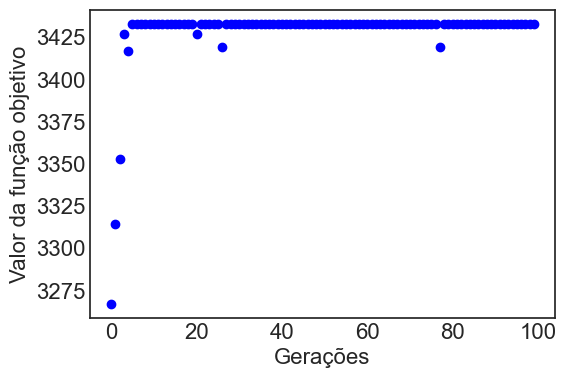

0.06956270213285314
0.034078885100767786
0.039865001811145356
0.09349300406834596
0.05444673763073615
0.06735605246503483
0.0652540528578932
0.04231934973757399
0.009022484178748536
0.07574650349019353
0.032601116515032814
0.04162433413605646
0.06483943172223786
0.08145102208954064
0.02169676365218889
0.07714845781635293
0.09088430407891701
0.07281381181768776
0.05197113006265314
0.0816395190410534
0.006480171186623496
0.061733773400254655
0.032999011226550315
0.024739596735490546
0.06248668046255345
0.08073441367879099
0.0729615947153798
0.046266355152688315
0.0270000274022974
0.011239680731064251
0.09807353865000207
0.053995654837898005
0.004797621360700766
0.09101131064587777
0.004274950646710596
0.06824823825688048
0.09919526359379881
0.032089896711567055
0.05601236566747735
0.09200850119211608
0.08541145392545683
0.09776023846880437
0.0027724701828258816
0.08281165899264464
0.03236340680980372
0.041492215032926105
0.08651574496369684
0.02720326870115657
0.036326155826582496
0.0172

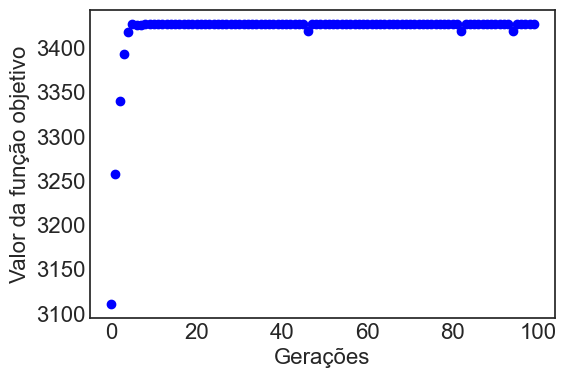

In [8]:
num_iterations = 2

first_gens = []
best_values = []
population_gen_type = problem.initial_population_type
problem_type = "knapsack"
convergences = []

for i in range(num_iterations):
    iteration = IDLHC(problem, num_pdf=num_pdf, num_cut_pdf=num_cut_pdf)
    iteration.do()
    best_value = max(iteration.convergence_array)
    best_values.append(best_value)
    convergences.append(iteration.convergence_array)

    for n in range(len(iteration.convergence_array)):
        if iteration.convergence_array[n] == best_values[i]:
            first_gens.append(n)
            break
    
    # item_var = {"Iteration": i, "Best value per generation": max(iteration.convergence_array), "First generation to reach best value": n, "type": problem.initial_population_type}



In [9]:
import pandas as pd
from pathlib import Path  

df2 = pd.DataFrame(

    {
        "best_value" : best_values,
        "firstgen_with_best_value": first_gens,
        "population_gen_type": population_gen_type,
        "problem_type" : problem_type,
        "convergence_array": ''
    }
)

for i in range(len(best_values)):
    df2.at[i,"convergence_array"] = convergences[i]

filepath = Path('metrics/knapsack.csv')

filepath.parent.mkdir(parents=True, exist_ok=True)  

df2.to_csv(filepath,mode='a',index=False,header=True)

In [10]:
df2.head()

,best_value,firstgen_with_best_value,population_gen_type,problem_type,convergence_array
0,3433,5,2,knapsack,"[3111, 3257, 3340, 3393, 3417, 3427, 3425, 342..."
1,3427,5,2,knapsack,"[3111, 3257, 3340, 3393, 3417, 3427, 3425, 342..."
